In [18]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config
import pprint
import pandas as pd


#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))


In [19]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return results

In [24]:
tracks=get_playlist_tracks('spotify','5GvoMXhmKeYvrdqKINFKaT')

In [28]:
tracks.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [21]:
songs = sp.tracks(song_ids)['tracks']

In [22]:
list_of_audio_features=[]
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks['items'][0]["track"]["id"][0]))

In [32]:
list_of_songs=[]
for item in tracks['items']:
    list_of_songs.append(sp.audio_features(item["track"]["id"])[0])
    
df=pd.DataFrame(list_of_songs)    
df=df[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.799,0.484,-10.484,0.0409,0.564000,0.930,0.0863,0.1360,128.006,1uXUZfJykefWuwj9VtyxIq,600122
1,0.819,0.383,-11.922,0.0462,0.002180,0.908,0.0928,0.2230,123.997,5dayqPrW7a4b2Skq3EcxWK,560080
2,0.804,0.534,-12.471,0.0720,0.000445,0.899,0.1060,0.2610,126.010,5bsqVWz1HriB7VTkUyPHRC,366866
3,0.716,0.534,-9.327,0.0531,0.007290,0.740,0.0682,0.2710,123.003,18MlLrfCkYOnKutil99GwY,444878
4,0.662,0.429,-12.522,0.0437,0.041800,0.882,0.1050,0.1500,121.034,5WL6VbqrAs7qYsMkCvShoN,257851
5,0.678,0.713,-6.451,0.0487,0.001360,0.865,0.0837,0.1900,127.993,77cHi3HzlrS8XDgue2WT8y,330000
6,0.734,0.621,-11.638,0.0501,0.147000,0.942,0.1000,0.2740,116.998,0YDF7cthGHQyNu7vHYGmyb,467692
7,0.752,0.413,-9.530,0.0502,0.025000,0.906,0.1130,0.1690,115.005,76Uea9JzqkVJhMXAWHT2WW,434087
8,0.676,0.707,-9.811,0.0572,0.112000,0.916,0.0914,0.7720,124.000,7mf9chuUZHpfyysoNH3WY0,340645
9,0.756,0.404,-11.767,0.0439,0.066300,0.912,0.1010,0.1980,120.005,5G04a8o6Ta2MzLlrH4QdQN,364000


In [33]:
song_ids = df['id']
# Get information about the songs using the Spotify API
songs = sp.tracks(song_ids)['tracks']

# Print the song names and artists
for song in songs:
    print(song['name'], 'by', song['artists'][0]['name'])

Trauma - Worakls Remix by NTO
Coeur De La Nuit - Worakls Remix by Ferdinand Dreyssig
Question réponse by Worakls
Alter Ego by NTO
Carrousel - Short Version by NTO
Porto by Worakls
Charlie by NTO
Mellotron by Worakls
Adagio for Square by Worakls
Entrudo by Worakls
The Hound by NTO
Corsair by Joachim Pastor
Cloches by Worakls
Eiffel Powder by Joachim Pastor
The Morning After by NTO
Millenium by Joachim Pastor
Ariane by Joachim Pastor
Salzburg by Worakls
Eternity by Joachim Pastor
Croche by NTO
Toi by Worakls
Joda - Worakls Remix by Joachim Pastor
Nocturne by Worakls
Invisible by NTO


In [34]:
#noch einmal
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return results

In [36]:
tracks2=get_playlist_tracks('spotify','37i9dQZF1DXbITWG1ZJKYt')

In [38]:
songs2 = sp.tracks(song_ids)['tracks']

In [39]:
list_of_audio_features2=[]
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features2.append(sp.audio_features(tracks['items'][0]["track"]["id"][0]))

In [40]:
list_of_songs2=[]
for item in tracks2['items']:
    list_of_songs2.append(sp.audio_features(item["track"]["id"])[0])
    
df2=pd.DataFrame(list_of_songs2)    
df2=df2[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.468,0.3910,-13.196,0.0269,0.6580,0.061700,0.1110,0.3420,142.413,1ChYuSIoOFDVY6fHSXF6zS,550493
1,0.392,0.1680,-22.249,0.0442,0.6370,0.358000,0.1980,0.2920,123.419,5Vmt3ascqbh0QJCV1een0Q,277800
2,0.624,0.3830,-10.561,0.0633,0.6270,0.000005,0.0963,0.6740,117.526,3bYBPyLGsa1unDrVaNzN4y,331267
3,0.585,0.3750,-12.171,0.0504,0.7800,0.003650,0.0806,0.6650,72.590,5wcAcShxT5qvLJvuM6jkZt,367400
4,0.503,0.3440,-19.024,0.0369,0.6730,0.381000,0.0960,0.4680,108.489,0m8tSPLHhjhGToD6LW0RPp,191933
5,0.357,0.1440,-11.261,0.0313,0.9570,0.288000,0.2350,0.1380,77.983,1JXxyiihPJrMLotLklU0Cb,374627
6,0.552,0.5090,-9.828,0.0428,0.6050,0.509000,0.0827,0.7400,112.049,05LNBtMuc26HSAHh7C6iG8,407600
7,0.437,0.0857,-18.129,0.0384,0.8400,0.641000,0.0898,0.2060,73.161,5uNtaTmigAubx5fLfO92AW,259413
8,0.571,0.2930,-11.914,0.0385,0.8280,0.179000,0.1120,0.2300,82.745,57B6gMEI1E4E3kKLKvfX3U,480000
9,0.579,0.5660,-8.733,0.0531,0.7540,0.538000,0.0987,0.8300,125.031,3k7MPapSDy9kSWuhvXxP3c,281987


In [41]:
song_ids2 = df2['id']
# Get information about the songs using the Spotify API
songs = sp.tracks(song_ids2)['tracks']

# Print the song names and artists
for song in songs:
    print(song['name'], 'by', song['artists'][0]['name'])

Questar by Keith Jarrett
Conference Of The Birds by Dave Holland Quartet
Two Not One by Lee Konitz
My Groove Your Move - Rudy Van Gelder Edition by Hank Mobley
Windows by Chick Corea
Dorene Don't Cry, I - Remastered by Stanley Turrentine
St. Thomas by Sonny Rollins
For Lena And Lennie by Quincy Jones
Yams by Jackie McLean
Hoe Down by Oliver Nelson
Quick Trick by Art Blakey & The Jazz Messengers
Cottontail by Earl Hines
Too Close For Comfort by Jutta Hipp
Triste by Oscar Peterson Trio
Lazy Afternoon by Joe Henderson
Solitude by Sonny Rollins
I Can't Give You Anything But Love by Sonny Clark
Blues Inn - Remastered by Jackie McLean
Tenor Madness - Rudy Van Gelder Remaster by Sonny Rollins Quartet
I Remember You by Lee Konitz
502 Blues (Drinkin' And Drivin') - Rudy Van Gelder Edition/2000 Digital Remaster/24 Bit Mastering by Wayne Shorter
Danny's Dream by Lars Gullin
Blue Skies by Art Tatum
Koko - Original Take 2 by Charlie Parker
He's Younger Than You Are - From "Alfie" Score by Sonny Rol

In [42]:
#nochmal
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return results

In [49]:
tracks3=get_playlist_tracks('spotify','37i9dQZF1DZ06evO2Ufkkg')

In [50]:
songs3 = sp.tracks(song_ids)['tracks']

In [51]:
list_of_audio_features3=[]
for item in range(0,50):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features3.append(sp.audio_features(tracks['items'][0]["track"]["id"][0]))

In [52]:
list_of_songs3=[]
for item in tracks3['items']:
    list_of_songs3.append(sp.audio_features(item["track"]["id"])[0])
    
df3=pd.DataFrame(list_of_songs3)    
df3=df3[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","id","duration_ms"]]
df3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.770,0.843,-6.792,0.0405,0.4290,0.420000,0.1140,0.475,139.994,7n3f6PoPm7LPBYYYlA8lzi,181914
1,0.750,0.662,-6.142,0.2390,0.5600,0.000000,0.1330,0.533,123.949,50mQStZYV5QFgyGK9GOVZg,263647
2,0.656,0.756,-4.026,0.3000,0.4350,0.000000,0.0934,0.645,168.031,2kkcJ8tSDV42LdWcPjy6We,188057
3,0.767,0.558,-6.638,0.2200,0.4710,0.000000,0.0653,0.325,110.573,1EbdQ54jFLGEH94cUif3TI,174680
4,0.480,0.749,-5.057,0.4320,0.5330,0.000000,0.0997,0.419,179.056,67ojvEGRPAUCOohuMPqoRC,194534
5,0.694,0.640,-6.000,0.1270,0.0474,0.000003,0.3900,0.195,89.964,5T8d11vkU2b3bIRSMIBrCC,212007
6,0.781,0.712,-4.390,0.0436,0.0930,0.000280,0.1360,0.320,102.052,1VcHYhlqqEDdN2D2sumdWo,153773
7,0.826,0.787,-6.351,0.0432,0.4970,0.000063,0.1590,0.510,125.017,3udydGp3WtLkUs7qL5G6Ll,176428
8,0.631,0.673,-4.892,0.3840,0.4070,0.000000,0.1540,0.721,83.504,0Dlcu2fgHklOnajVu2dUNU,172036
9,0.760,0.711,-4.964,0.1080,0.0746,0.000000,0.1040,0.573,124.991,1pPG60ifB0mxK3hVjQQ1dn,144987


In [53]:
song_ids3 = df3['id']
# Get information about the songs using the Spotify API
songs = sp.tracks(song_ids3)['tracks']

# Print the song names and artists
for song in songs:
    print(song['name'], 'by', song['artists'][0]['name'])
    

Discokugel by Gustav
Neymar by Capital Bra
Wieder Lila by Samra
7 Stunden by LEA
110 by Capital Bra
BERETTA by Farid Bang
VIJA VIJA by DJ Gimi-O
UUU (feat. Capital Bra) by Noah
Tilidin by Capital Bra
0Uhr26 by Capital Bra
Viva la Dealer by SDP
Diamonds (feat. Capital Bra) by Summer Cem
Cherry Lady by Capital Bra
Purple Rain by Capital Bra
One Night Stand by Capital Bra
BLESSED (feat. Capital Bra) by CRO
Melodien by Capital Bra
KEIN PLATZ by Capital Bra
Lieber Gott by Capital Bra
Sommer by Beatzarre & Djorkaeff
Andere Welt by Capital Bra
Berlin lebt by Capital Bra
DNA by KC Rebell
Frühstück in Paris by Capital Bra
Steig ein (feat. Haftbefehl) by Capital Bra
Benzema by Capital Bra
Ein Jahr (feat. Montez) by Capital Bra
Musik by Capital Bra
Gottes Plan by Ra'is
Prinzessa by Capital Bra
Olé Olé by Capital Bra
5 Songs in einer Nacht by Capital Bra
Royal Rumble by Kalazh44
Allein by Capital Bra
Die Echten by Capital Bra
Kennzeichen B-TK by Capital Bra
Einsam an der Spitze by Capital Bra
Wir 

In [106]:
all_df = pd.concat([df,df2,df3])
all_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,1uXUZfJykefWuwj9VtyxIq,600122
1,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,5dayqPrW7a4b2Skq3EcxWK,560080
2,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,5bsqVWz1HriB7VTkUyPHRC,366866
3,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,18MlLrfCkYOnKutil99GwY,444878
4,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,5WL6VbqrAs7qYsMkCvShoN,257851
...,...,...,...,...,...,...,...,...,...,...,...
45,0.724,0.775,-8.416,0.3830,0.317000,0.000000,0.0680,0.829,173.957,549S69d1QhlRpLdMqhA5dh,148040
46,0.719,0.650,-7.274,0.2320,0.381000,0.000000,0.1670,0.488,77.981,7v8OynJxOxHoeS5C2UA9Y7,176953
47,0.949,0.487,-8.585,0.0717,0.176000,0.000344,0.0959,0.313,123.013,5ezbc8nalmV7JqLQQfHwTV,176010
48,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,5XL8t0sfvBdwdH7RrHQMtv,92933


In [92]:
all_df = all_df.drop(columns=['id'])

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,2
1,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,2
2,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,2
3,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,2
4,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,2
...,...,...,...,...,...,...,...,...,...,...,...
45,148040,0.724,0.775,-8.416,0.3830,0.317000,0.000000,0.0680,0.829,173.957,0
46,176953,0.719,0.650,-7.274,0.2320,0.381000,0.000000,0.1670,0.488,77.981,0
47,176010,0.949,0.487,-8.585,0.0717,0.176000,0.000344,0.0959,0.313,123.013,0
48,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,0


In [55]:
len(all_df)

124

In [107]:
cols = all_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [108]:
cols

['duration_ms',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'id']

In [109]:
all_df = all_df[cols]  

In [110]:
all_df

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id
0,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,1uXUZfJykefWuwj9VtyxIq
1,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,5dayqPrW7a4b2Skq3EcxWK
2,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,5bsqVWz1HriB7VTkUyPHRC
3,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,18MlLrfCkYOnKutil99GwY
4,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,5WL6VbqrAs7qYsMkCvShoN
...,...,...,...,...,...,...,...,...,...,...,...
45,148040,0.724,0.775,-8.416,0.3830,0.317000,0.000000,0.0680,0.829,173.957,549S69d1QhlRpLdMqhA5dh
46,176953,0.719,0.650,-7.274,0.2320,0.381000,0.000000,0.1670,0.488,77.981,7v8OynJxOxHoeS5C2UA9Y7
47,176010,0.949,0.487,-8.585,0.0717,0.176000,0.000344,0.0959,0.313,123.013,5ezbc8nalmV7JqLQQfHwTV
48,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,5XL8t0sfvBdwdH7RrHQMtv


In [111]:
cols = all_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [112]:
all_df = all_df[cols] 

In [113]:
all_df

,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1uXUZfJykefWuwj9VtyxIq,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006
1,5dayqPrW7a4b2Skq3EcxWK,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997
2,5bsqVWz1HriB7VTkUyPHRC,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010
3,18MlLrfCkYOnKutil99GwY,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003
4,5WL6VbqrAs7qYsMkCvShoN,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034
...,...,...,...,...,...,...,...,...,...,...,...
45,549S69d1QhlRpLdMqhA5dh,148040,0.724,0.775,-8.416,0.3830,0.317000,0.000000,0.0680,0.829,173.957
46,7v8OynJxOxHoeS5C2UA9Y7,176953,0.719,0.650,-7.274,0.2320,0.381000,0.000000,0.1670,0.488,77.981
47,5ezbc8nalmV7JqLQQfHwTV,176010,0.949,0.487,-8.585,0.0717,0.176000,0.000344,0.0959,0.313,123.013
48,5XL8t0sfvBdwdH7RrHQMtv,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006


In [70]:
len(all_df.columns)

11

In [114]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Save the ID column you don't want to scale
not_scaled = all_df['id']

# Drop the ID column and scale the remaining columns
scaled_cols = scaler.fit_transform(all_df.drop(columns=['id']))

# Create a new dataframe with the scaled columns and the ID column
df_scaled = pd.DataFrame(scaled_cols, not_scaled, columns=all_df.columns[1:])
df_scaled

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,
1uXUZfJykefWuwj9VtyxIq,2.366372,1.099479,-0.092526,-0.054483,-0.675966,0.342015,1.717661,-0.569472,-1.403547,0.402105
5dayqPrW7a4b2Skq3EcxWK,2.063213,1.231594,-0.538815,-0.346075,-0.631655,-1.325157,1.658919,-0.500783,-0.976481,0.272227
5bsqVWz1HriB7VTkUyPHRC,0.600381,1.132508,0.128410,-0.457399,-0.415950,-1.330305,1.634889,-0.361291,-0.789946,0.337442
18MlLrfCkYOnKutil99GwY,1.191013,0.551205,0.128410,0.180129,-0.573966,-1.309993,1.210345,-0.760745,-0.740858,0.240025
5WL6VbqrAs7qYsMkCvShoN,-0.224976,0.194496,-0.335555,-0.467741,-0.652556,-1.207586,1.589497,-0.371859,-1.334824,0.176236
...,...,...,...,...,...,...,...,...,...,...
549S69d1QhlRpLdMqhA5dh,-1.056360,0.604050,1.193319,0.364858,2.184216,-0.390945,-0.765517,-0.762859,1.998258,1.890765
7v8OynJxOxHoeS5C2UA9Y7,-0.837458,0.571022,0.640980,0.596428,0.921756,-0.201028,-0.765517,0.283330,0.324354,-1.218538
5ezbc8nalmV7JqLQQfHwTV,-0.844598,2.090337,-0.079270,0.330589,-0.418458,-0.809355,-0.764599,-0.468024,-0.534688,0.240349


In [94]:
all_df = all_df.drop(columns=['id'])

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(all_df)

# Transform the data using the scaler
scaled_df = scaler.transform(all_df)

scaled_df


array([[ 2.36637233,  1.09947946, -0.09252567, ..., -1.40354748,
         0.40210537,  1.63102719],
       [ 2.06321265,  1.23159386, -0.53881549, ..., -0.97648103,
         0.27222712,  1.63102719],
       [ 0.60038123,  1.13250806,  0.12840988, ..., -0.78994626,
         0.33744162,  1.63102719],
       ...,
       [-0.84459767,  2.09033744, -0.07926954, ..., -0.53468815,
         0.2403488 , -1.04774594],
       [-1.47357717,  1.49582265,  0.65865521, ..., -0.27452123,
         0.46689871, -1.04774594],
       [-1.03171598,  0.14165007,  1.22425023, ...,  1.04594861,
         2.07685119, -1.04774594]])

In [71]:
len(all_df.columns)

11

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

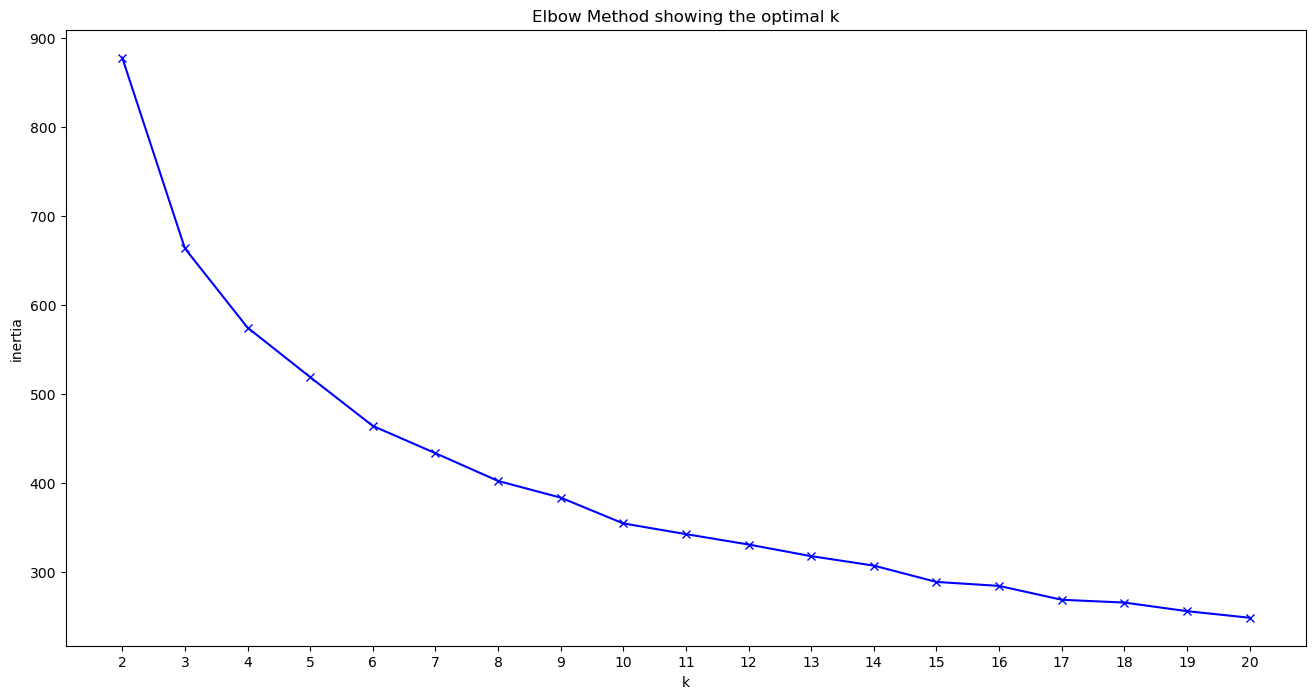

In [118]:
from sklearn.cluster import KMeans
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
#elbow shows 3, makes sense because I have 3 different lists.

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

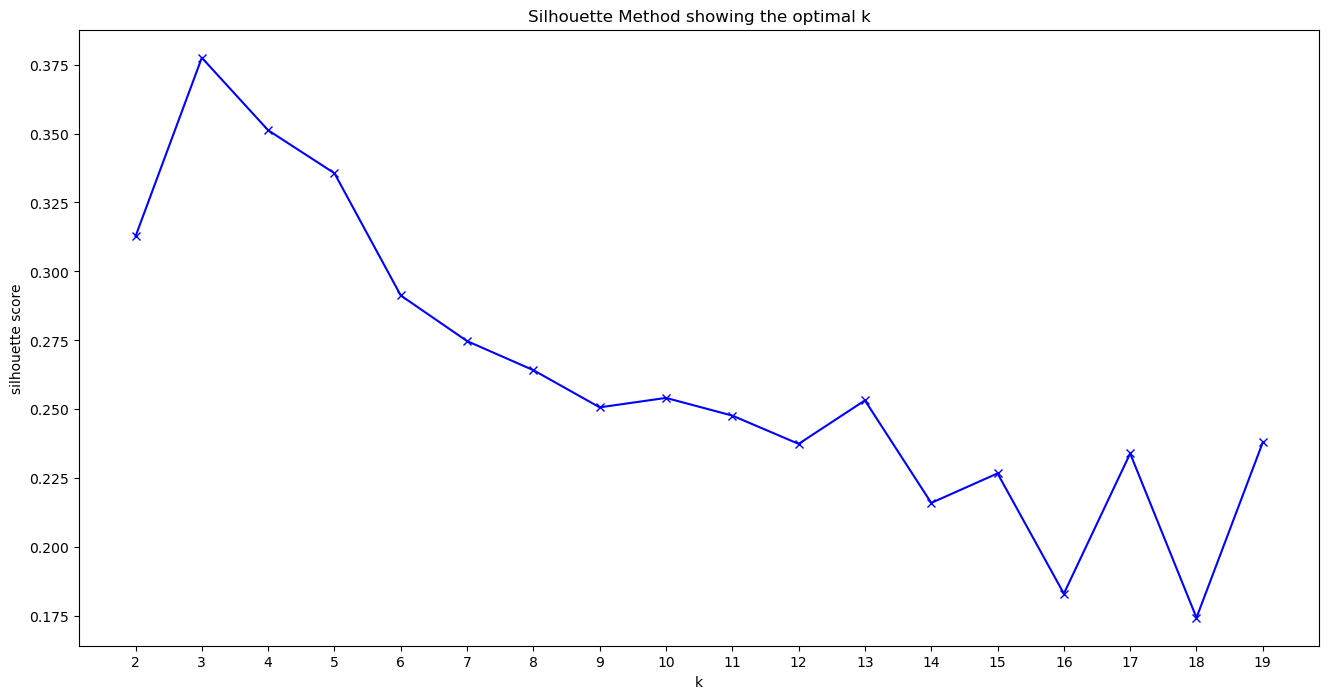

In [119]:
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

import os

if not os.path.exists('Model'):
    os.makedirs('Model')


K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(df_scaled)
    
    filename = "Model.pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(scaled_df, kmeans.predict(df_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
#silhoutte also shows 3, I have 3, I go with 3.

In [120]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [121]:
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

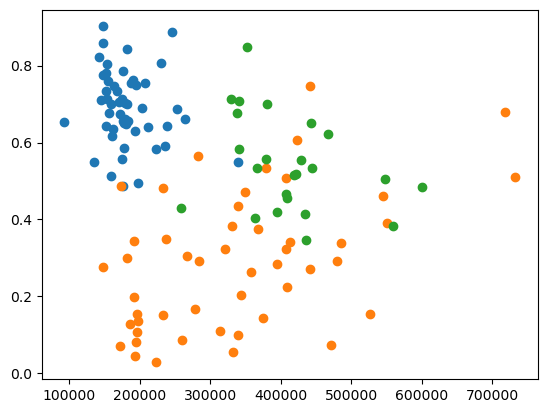

In [77]:
labels = kmeans.predict(df_scaled)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(all_df.to_numpy()[row_ix, 1], all_df.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [122]:
clusters = kmeans.predict(df_scaled)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    51
1    49
2    24
dtype: int64

In [123]:
all_df["cluster"] = clusters
all_df

/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_72732/496762211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df["cluster"] = clusters


,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,1uXUZfJykefWuwj9VtyxIq,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,2
1,5dayqPrW7a4b2Skq3EcxWK,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,2
2,5bsqVWz1HriB7VTkUyPHRC,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,2
3,18MlLrfCkYOnKutil99GwY,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,2
4,5WL6VbqrAs7qYsMkCvShoN,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,2
...,...,...,...,...,...,...,...,...,...,...,...,...
45,549S69d1QhlRpLdMqhA5dh,148040,0.724,0.775,-8.416,0.3830,0.317000,0.000000,0.0680,0.829,173.957,0
46,7v8OynJxOxHoeS5C2UA9Y7,176953,0.719,0.650,-7.274,0.2320,0.381000,0.000000,0.1670,0.488,77.981,0
47,5ezbc8nalmV7JqLQQfHwTV,176010,0.949,0.487,-8.585,0.0717,0.176000,0.000344,0.0959,0.313,123.013,0
48,5XL8t0sfvBdwdH7RrHQMtv,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,0


In [ ]:
song_name = []
num_iter = len(soup.select("#title-of-a-story.c-title.a-no-trucate"))

In [ ]:
song_name = []

for title in soup.select("#title-of-a-story.c-title.a-no-trucate"):
    song_name.append(title.get_text("/", strip=True))


In [ ]:
print(song_name)

In [ ]:
low_song = [x.lower() for x in song_name]
low_song

In [ ]:
import random
a = random.choice(low_song)
a

In [ ]:
user_input = input("Check if your favorite song is hot!: ")

user_input = user_input[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
    input_scaled = scaler.transform(user_input)
    input_scaled_df = pd.DataFrame(input_scaled, columns = user_input.columns)
    print(display(input_scaled_df.head()))


if user_input in all_df:
    print("It is in the top100! Here is another hot song for you: ", a)
elif user_input.lower() in all_df:
    user_input = user_input[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
    input_scaled = scaler.transform(user_input)
    input_scaled_df = pd.DataFrame(input_scaled, columns = user_input.columns)
    print(display(input_scaled_df.head()))
else:
    print("Unfortunately, the song is not in the hot list!")

In [85]:
sample = all_df.sample()
sample

,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
11,2nPJnablplDgVVgSDF9BAs,197013,0.763,0.495,-8.685,0.272,0.0887,0.0,0.07,0.347,154.794,0


In [87]:
sample= sample[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

In [88]:
sample_scaled = scaler.transform(sample)
sample_scaled_df = pd.DataFrame(sample_scaled, columns = sample.columns)
print(display(sample_scaled_df.head()))

/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-2.177171,-0.908659,-40.607687,2.126577,-0.276327,-1.331626,-0.578611,2.185491,757.783159,6378.820148


None


In [125]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# set up Spotify API credentials
#client_id = "your_client_id"
#client_secret = "your_client_secret"
#client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# load your dataframe with song ids and audio features
#df = pd.read_csv("your_dataframe.csv")

# scale your audio features
#scaler = StandardScaler()
scaled_features = scaled_df #scaler.fit_transform(df.iloc[:, 1:-1])

# fit KMeans clustering model with k=3
#kmeans = KMeans(n_clusters=3, random_state=1234)
#kmeans.fit(scaled_features)

# define function to recommend songs from the same cluster
def recommend_song(song_name):
    # search for the song on Spotify
    results = sp.search(q=song_name, type='track')
    if len(results['tracks']['items']) == 0:
        return "Sorry, we could not find a song with that name. Please try again."
    else:
        # get audio features of the song
        song_id = results['tracks']['items'][0]['id']
        audio_features = sp.audio_features(song_id)[0]
        audio_features = np.array([audio_features['danceability'], audio_features['energy'], 
                                   audio_features['loudness'], audio_features['speechiness'], 
                                   audio_features['acousticness'], audio_features['instrumentalness'], 
                                   audio_features['liveness'], audio_features['valence'], audio_features['tempo'], audio_features['duration_ms']])
        scaled_audio_features = scaler.transform(audio_features.reshape(1,-1))
        # predict the cluster of the song
        cluster = kmeans.predict(scaled_audio_features)[0]
        # get the list of songs from the same cluster
        songs_in_cluster = all_df[all_df['cluster'] == cluster]['id']
        # choose a random song from the same cluster
        recommended_song = np.random.choice(songs_in_cluster)
        return recommended_song
    
# test the recommend_song function
song_name = input("Please enter a song name: ")
print("We recommend:", recommend_song(song_name))


Please enter a song name: Nocturne
We recommend: 6AFIVhbJLR7YVvW9fLFMu1


/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# add a new column to the dataframe with the song names
df['name'] = song_names

# function to get song name from id
def get_song_name(song_id):
    return df[df['id'] == song_id]['name'].iloc[0]

# function to recommend a song based on input song name
def recommend_song(song_name):
    # find the cluster of the input song
    input_song = df[df['name'] == song_name]
    input_cluster = kmeans.predict(scaler.transform(input_song.iloc[:, :-2]))[0]
    
    # find a song in the same cluster that is not the input song
    cluster_songs = df[df['cluster'] == input_cluster]
    cluster_songs = cluster_songs[cluster_songs['name'] != song_name]
    recommended_song_id = cluster_songs.sample()['id'].values[0]
    
    # get the name of the recommended song and return it
    recommended_song_name = get_song_name(recommended_song_id)
    return recommended_song_name


In [127]:
# define a list of song ids
id_list = all_df['id']

# initialize an empty list to store song names
song_names = []

# loop through the song ids and get the corresponding song names using the Spotify API
for song_id in id_list:
    track_info = sp.track(song_id)
    song_name = track_info['name']
    song_names.append(song_name)

# add a new column to the dataframe with the song names
all_df['name'] = song_names
all_df


/var/folders/p4/_ylldw792tx5lq22msk41v500000gn/T/ipykernel_72732/846140192.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['name'] = song_names


,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,name
0,1uXUZfJykefWuwj9VtyxIq,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,2,Trauma - Worakls Remix
1,5dayqPrW7a4b2Skq3EcxWK,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,2,Coeur De La Nuit - Worakls Remix
2,5bsqVWz1HriB7VTkUyPHRC,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,2,Question réponse
3,18MlLrfCkYOnKutil99GwY,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,2,Alter Ego
4,5WL6VbqrAs7qYsMkCvShoN,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,2,Carrousel - Short Version
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,549S69d1QhlRpLdMqhA5dh,148040,0.724,0.775,-8.416,0.3830,0.317000,0.000000,0.0680,0.829,173.957,0,BMDBM
46,7v8OynJxOxHoeS5C2UA9Y7,176953,0.719,0.650,-7.274,0.2320,0.381000,0.000000,0.1670,0.488,77.981,0,Nicht verdient
47,5ezbc8nalmV7JqLQQfHwTV,176010,0.949,0.487,-8.585,0.0717,0.176000,0.000344,0.0959,0.313,123.013,0,No Comprendo
48,5XL8t0sfvBdwdH7RrHQMtv,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,0,Intro


hot songs


In [128]:
import sys
!conda install --yes --prefix {sys.prefix} -c anaconda beautifulsoup4
!conda install --yes --prefix {sys.prefix} -c anaconda requests

Retrieving notices: ...working... done
Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [129]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import pprint as pp

In [130]:
url = "https://www.billboard.com/charts/hot-100/"

In [131]:
response = requests.get(url)

In [132]:
response.status_code

200

In [133]:
soup = BeautifulSoup(response.content, "html.parser")

In [134]:
result = soup.select("#post-1479786 > div.pmc-paywall > div > div > div > div.chart-results-list.\/\/.lrv-u-padding-t-150.lrv-u-padding-t-050\@mobile-max > div:nth-child(2) > ul > li.lrv-u-width-100p > ul > li.o-chart-results-list__item.\/\/.lrv-u-flex-grow-1.lrv-u-flex.lrv-u-flex-direction-column.lrv-u-justify-content-center.lrv-u-border-b-1.u-border-b-0\@mobile-max.lrv-u-border-color-grey-light.lrv-u-padding-l-1\@mobile-max")

In [135]:
result

[<li class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-1@mobile-max">
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Kill Bill		
 	
 </h3>
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	SZA
 </span>
 </li>]

In [136]:
song_info = []

for title in soup.select("#post-1479786 > div.charts-top-featured.\/\/.lrv-a-wrapper.lrv-u-padding-lr-00\@mobile-max.u-padding-b-350\@tablet.u-padding-b-250 > div > div.a-span2.lrv-u-padding-r-2.lrv-u-padding-r-00\@mobile-max.lrv-u-height-100p > div.lrv-u-flex.lrv-u-justify-content-space-between.lrv-u-margin-b-2.lrv-u-margin-b-00\@mobile-max.u-background-color-black\@mobile-max.u-color-white\@mobile-max.lrv-u-padding-lr-125\@mobile-max"):
    song_info.append(title.get_text("/", strip=True))


In [137]:
top100_list = soup.select("#title-of-a-story.c-title.a-no-trucate")
top100_list

[<h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Kill Bill		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Last Night		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 lrv-u-font-size-18@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-330 u-max-width-230@tablet-only" id="title-of-a-story">
 
 	
 	
 		
 					Flowers		
 	
 </h3>,
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0

In [138]:
song_name = []

In [139]:
num_iter = len(soup.select("#title-of-a-story.c-title.a-no-trucate"))

In [140]:
song_name = []

for title in soup.select("#title-of-a-story.c-title.a-no-trucate"):
    song_name.append(title.get_text("/", strip=True))

In [141]:
low_song = [x.lower() for x in song_name]
low_song

['kill bill',
 'last night',
 'flowers',
 'princess diana',
 'ella baila sola',
 "creepin'",
 'calm down',
 'die for you',
 'search & rescue',
 "boy's a liar, pt. 2",
 'anti-hero',
 'la bebe',
 'chemical',
 'favorite song',
 'un x100to',
 'players',
 'rock and a hard place',
 'you proof',
 'fast car',
 'sure thing',
 'as it was',
 "thinkin' bout me",
 'lavender haze',
 'one thing at a time',
 'thought you should know',
 "i'm good (blue)",
 'under the influence',
 'thank god',
 'something in the orange',
 'escapism',
 'slut me out',
 'por las noches',
 'unholy',
 'wait in the truck',
 'prc',
 'just wanna rock',
 'handle on you',
 "dancin' in the country",
 'snooze',
 'amg',
 'superhero (heroes & villains)',
 'tqg',
 'rich flex',
 'love you anyway',
 'spin bout u',
 'next thing you know',
 'eyes closed',
 'daylight',
 'heart like a truck',
 'cupid',
 'wild as her',
 'bebe dame',
 'bloody mary',
 'tennessee orange',
 'fight the feeling',
 'peaches',
 'low down',
 'beso',
 'el azul',
 'red

In [142]:
import random

'superhero (heroes & villains)'

In [143]:
user_input = input("Check if your favorite song is hot!: ")
results = sp.search(q=song_name, type='track')

if user_input.lower() in low_song:
    print("It is in the top100! Here is another hot song for you: ", random.choice(low_song))
else:
    print("Unfortunately, the song is not in the hot list!")



if len(results['tracks']['items']) == 0:
    return "Sorry, we could not find a song with that name. Please try again."


Check if your favorite song is hot!: love again
It is in the top100! Here is another hot song for you:  dawns


In [167]:
from IPython.display import IFrame
def play_song(recommended_song_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [179]:
#ready
from IPython.display import IFrame
def recommend_song(song_name):
    results = sp.search(q=song_name, type='track')
    if len(results['tracks']['items']) == 0:
        return "Sorry, we could not find a song with that name. Please try again."
    else:
        song_id = results['tracks']['items'][0]['id']
        song_name = results['tracks']['items'][0]['name']
        audio_features = sp.audio_features(song_id)[0]
        audio_features = np.array([audio_features['danceability'], audio_features['energy'], 
                                   audio_features['loudness'], audio_features['speechiness'], 
                                   audio_features['acousticness'], audio_features['instrumentalness'], 
                                   audio_features['liveness'], audio_features['valence'], audio_features['tempo'], audio_features['duration_ms']])
        scaled_audio_features = scaler.transform(audio_features.reshape(1,-1))
        cluster = kmeans.predict(scaled_audio_features)[0]
        songs_in_cluster = all_df[all_df['cluster'] == cluster]['id']
        recommended_song_id = np.random.choice(songs_in_cluster)
        recommended_song_name = all_df[all_df['id'] == recommended_song_id]['name'].iloc[0]
        
        player = IFrame(src="https://open.spotify.com/embed/track/"+recommended_song_id,
                       width="320",
                       height="80",
                       frameborder="0",
                       allowtransparency="true",
                       allow="encrypted-media",
                      )
        
        return recommended_song_name, player
    
user_input = input("Check if your favorite song is hot!: ")

if user_input.lower() in low_song:
    print("It is in the top100! Here is another hot song for you: ", random.choice(low_song))
else:
    #display(play_song(recommended_song_id))
    #print("We recommend:", recommend_song(song_name))
    recommended_song_name, player = recommend_song(user_input)
    print("We recommend:", recommended_song_name)
    display(player)

Check if your favorite song is hot!: Nocturne
We recommend: Olé Olé


/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [165]:
play_song(recommend_song(input("check: ")))

check: nocturne


/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
play_song("1Y25uib0Cu5kYTtNuRqyRU")

In [ ]:
play_song(playlist["items"][0]["track"]["id"])

In [ ]:
def recommend_song(song_name):
    # search for the song on Spotify
    results = sp.search(q=song_name, type='track')
    if len(results['tracks']['items']) == 0:
        return "Sorry, we could not find a song with that name. Please try again."
    else:
        # get audio features of the song
        song_id = results['tracks']['items'][0]['id']
        song_name = results['tracks']['items'][0]['name']
        audio_features = sp.audio_features(song_id)[0]
        audio_features = np.array([audio_features['danceability'], audio_features['energy'], 
                                   audio_features['loudness'], audio_features['speechiness'], 
                                   audio_features['acousticness'], audio_features['instrumentalness'], 
                                   audio_features['liveness'], audio_features['valence'], audio_features['tempo'], audio_features['duration_ms']])
        scaled_audio_features = scaler.transform(audio_features.reshape(1,-1))
        # predict the cluster of the song
        cluster = kmeans.predict(scaled_audio_features)[0]
        # get the list of songs from the same cluster
        songs_in_cluster = all_df[all_df['cluster'] == cluster]['id']
        # choose a random song from the same cluster
        recommended_song_id = np.random.choice(songs_in_cluster)
        recommended_song_name = all_df[all_df['id'] == recommended_song_id]['name'].iloc[0]
        return recommended_song_name


In [149]:
all_df

,id,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,name
0,1uXUZfJykefWuwj9VtyxIq,600122,0.799,0.484,-10.484,0.0409,0.564000,0.930000,0.0863,0.136,128.006,2,Trauma - Worakls Remix
1,5dayqPrW7a4b2Skq3EcxWK,560080,0.819,0.383,-11.922,0.0462,0.002180,0.908000,0.0928,0.223,123.997,2,Coeur De La Nuit - Worakls Remix
2,5bsqVWz1HriB7VTkUyPHRC,366866,0.804,0.534,-12.471,0.0720,0.000445,0.899000,0.1060,0.261,126.010,2,Question réponse
3,18MlLrfCkYOnKutil99GwY,444878,0.716,0.534,-9.327,0.0531,0.007290,0.740000,0.0682,0.271,123.003,2,Alter Ego
4,5WL6VbqrAs7qYsMkCvShoN,257851,0.662,0.429,-12.522,0.0437,0.041800,0.882000,0.1050,0.150,121.034,2,Carrousel - Short Version
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,549S69d1QhlRpLdMqhA5dh,148040,0.724,0.775,-8.416,0.3830,0.317000,0.000000,0.0680,0.829,173.957,0,BMDBM
46,7v8OynJxOxHoeS5C2UA9Y7,176953,0.719,0.650,-7.274,0.2320,0.381000,0.000000,0.1670,0.488,77.981,0,Nicht verdient
47,5ezbc8nalmV7JqLQQfHwTV,176010,0.949,0.487,-8.585,0.0717,0.176000,0.000344,0.0959,0.313,123.013,0,No Comprendo
48,5XL8t0sfvBdwdH7RrHQMtv,92933,0.859,0.654,-7.584,0.3120,0.254000,0.000021,0.0827,0.366,130.006,0,Intro


In [158]:
#this one return id
def recommend_song(song_name):
    # search for the song on Spotify
    results = sp.search(q=song_name, type='track')
    if len(results['tracks']['items']) == 0:
        return "Sorry, we could not find a song with that name. Please try again."
    else:
        # get audio features of the song
        song_id = results['tracks']['items'][0]['id']
        audio_features = sp.audio_features(song_id)[0]
        audio_features = np.array([audio_features['danceability'], audio_features['energy'], 
                                   audio_features['loudness'], audio_features['speechiness'], 
                                   audio_features['acousticness'], audio_features['instrumentalness'], 
                                   audio_features['liveness'], audio_features['valence'], audio_features['tempo'], audio_features['duration_ms']])
        scaled_audio_features = scaler.transform(audio_features.reshape(1,-1))
        # predict the cluster of the song
        cluster = kmeans.predict(scaled_audio_features)[0]
        # get the list of songs from the same cluster
        songs_in_cluster = all_df[all_df['cluster'] == cluster]['id']
        # choose a random song from the same cluster
        recommended_song = np.random.choice(songs_in_cluster)
        return recommended_song
    
# test the recommend_song function
song_name = input("Please enter a song name: ")
print("We recommend:", recommend_song(song_name))

Please enter a song name: Nocturne
We recommend: 7pMc3ABRFP5oj6U9FfWmZE


/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/ilkaymueller/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#how i got names

id_list = all_df['id']

# initialize an empty list to store song names
song_names = []

# loop through the song ids and get the corresponding song names using the Spotify API
for song_id in id_list:
    track_info = sp.track(song_id)
    song_name = track_info['name']
    song_names.append(song_name)

# add a new column to the dataframe with the song names
all_df['name'] = song_names
all_df


In [ ]:
from IPython.display import IFrame

def recommend_song(song_name):
    results = sp.search(q=song_name, type='track')
    if len(results['tracks']['items']) == 0:
        return "Sorry, we could not find a song with that name. Please try again."
    else:
        song_id = results['tracks']['items'][0]['id']
        song_name = results['tracks']['items'][0]['name']
        audio_features = sp.audio_features(song_id)[0]
        audio_features = np.array([audio_features['danceability'], audio_features['energy'], 
                                   audio_features['loudness'], audio_features['speechiness'], 
                                   audio_features['acousticness'], audio_features['instrumentalness'], 
                                   audio_features['liveness'], audio_features['valence'], audio_features['tempo'], audio_features['duration_ms']])
        scaled_audio_features = scaler.transform(audio_features.reshape(1,-1))
        cluster = kmeans.predict(scaled_audio_features)[0]
        songs_in_cluster = all_df[all_df['cluster'] == cluster]['id']
        recommended_song_id = np.random.choice(songs_in_cluster)
        recommended_song_name = all_df[all_df['id'] == recommended_song_id]['name'].iloc[0]
        
        player = IFrame(src="https://open.spotify.com/embed/track/"+recommended_song_id,
                       width="320",
                       height="80",
                       frameborder="0",
                       allowtransparency="true",
                       allow="encrypted-media",
                      )
        
        return recommended_song_name, player

user_input = input("Check if your favorite song is hot!: ")

if user_input.lower() in low_song:
    print("It is in the top100! Here is another hot song for you: ", random.choice(low_song))
else:
    recommended_song_name, player = recommend_song(user_input)
    print("We recommend:", recommended_song_name)
    display(player)
